# Applying SMOTE

In [1]:
# Importing below listed libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing modules and classes from libraries. 
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


### Importing data

In [2]:
# Saving csv-file containing dataset into variable "df".
df = pd.read_csv("Spotify_Youtube.csv")

# Displaying the dataframe. 
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


### Data exploration

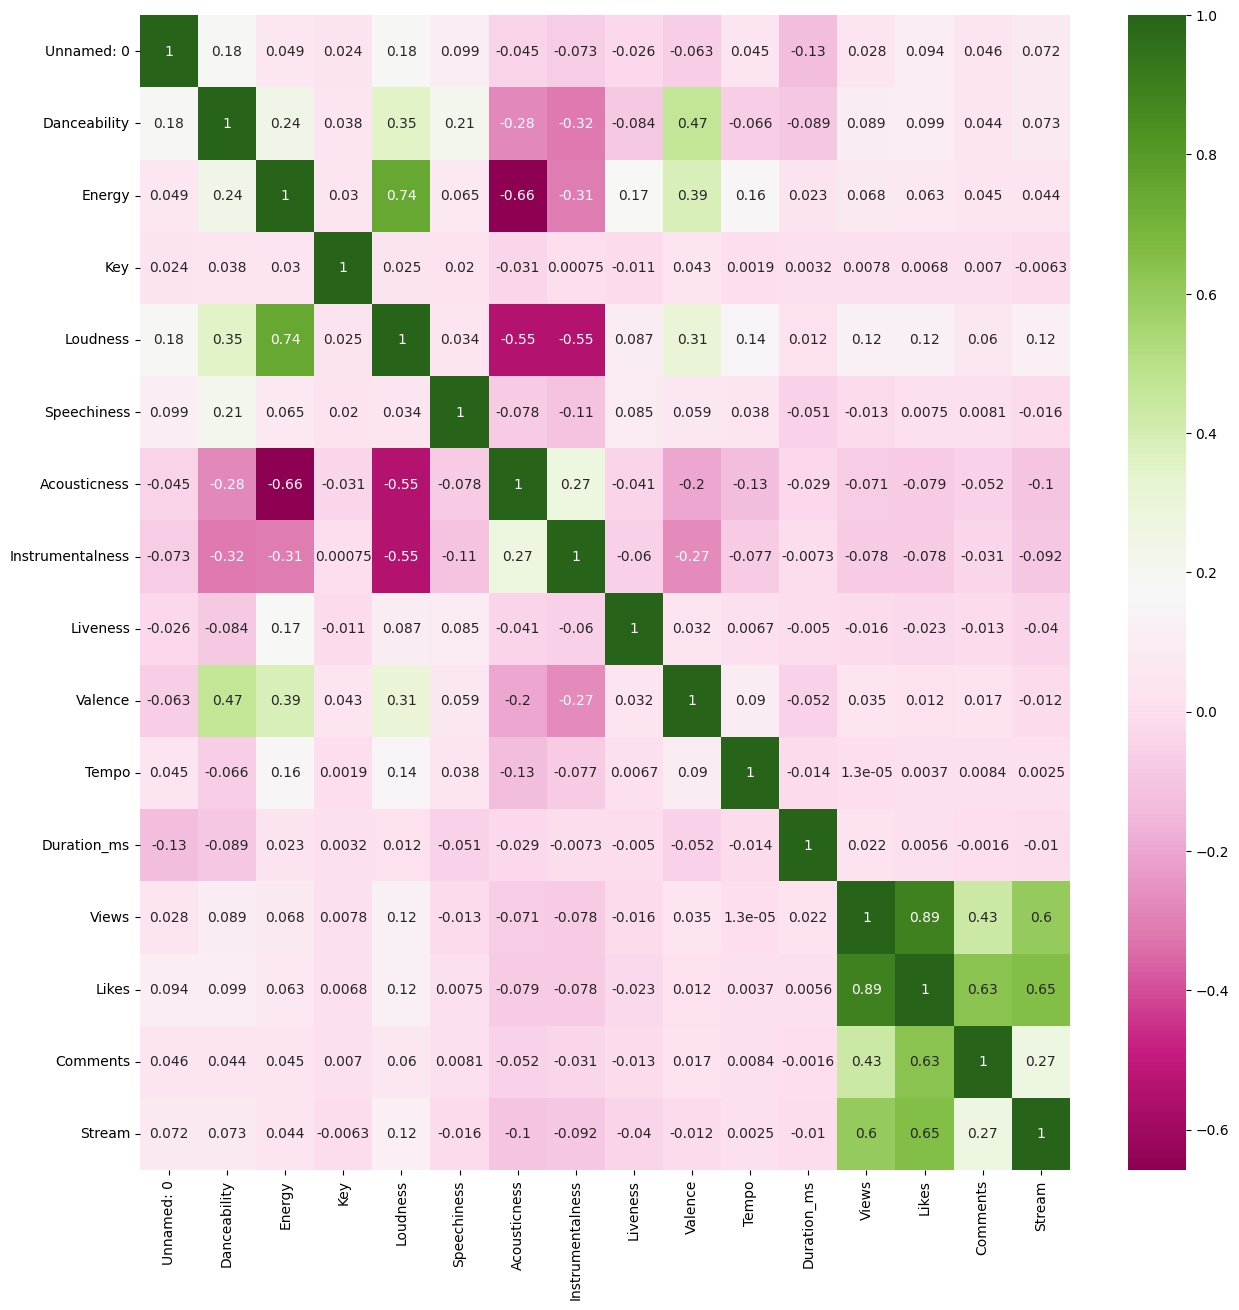

In [3]:
# Computing pairwise correlation of columns and saving it into variable "df_corr".
df_corr = df.corr()

# Creating a square-shaped figure.
fig, ax = plt.subplots(figsize=(15, 15))

# Generating the heatmap on the basis of "df_corr".
sns.heatmap(df_corr, annot=True, cmap='PiYG', ax=ax)

# Displaying the heatmap.
plt.show()

In [4]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Sort the correlation values of the "Stream" feature in descending order
stream_corr_sorted = corr_matrix['Stream'].abs().sort_values(ascending=False)

# Round the correlation values to 3 decimals
stream_corr_sorted = stream_corr_sorted.round(3)

# Print the most and least influential features
print("Most influential features:")
print(stream_corr_sorted.head(6))

print("\nLeast influential features:")
print(stream_corr_sorted.tail(6))


Most influential features:
Stream          1.000
Likes           0.654
Views           0.602
Comments        0.268
Loudness        0.119
Acousticness    0.105
Name: Stream, dtype: float64

Least influential features:
Liveness       0.040
Speechiness    0.016
Valence        0.012
Duration_ms    0.010
Key            0.006
Tempo          0.003
Name: Stream, dtype: float64


In [5]:
# Calculating the mean of the "Loudness" column.
mean = df['Loudness'].mean().round(2)
print("Mean value of the 'Loudness' column: ", mean)

# Calculating the median of the "Loudness" column.
median = df['Loudness'].median().round(2)
print("Median value of the 'Loudness' column: ", median)

# Determining the lowest and highest value of the "Loudness" column.
lowest_value = df['Loudness'].min()
highest_value = df['Loudness'].max()
print("Lowest value:", lowest_value)
print("Highest value:", highest_value)

Mean value of the 'Loudness' column:  -7.67
Median value of the 'Loudness' column:  -6.54
Lowest value: -46.251
Highest value: 0.92


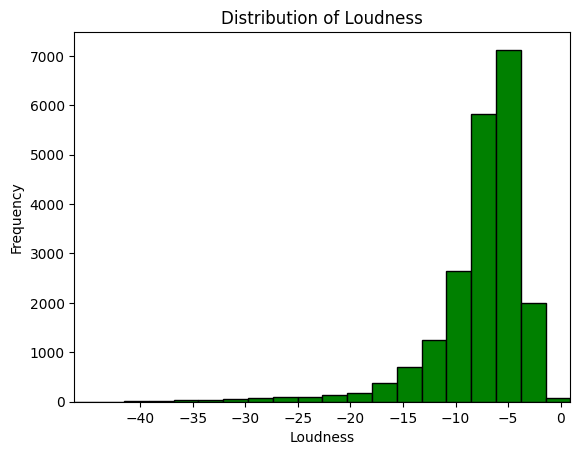

In [6]:
# Plotting the distribution of the "Loudness" feature
plt.hist(df['Loudness'], bins=20, edgecolor='black', color="Green")
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.title('Distribution of Loudness')
plt.xlim(-46.251, 0.92)
plt.xticks([-40, -35, -30, -25, -20, -15, -10, -5, 0])
plt.show()

In [7]:
# Calculating the mean of the "Stream" column.
mean = df['Stream'].mean().round(2)
print("Mean value of the 'Stream' column: ", mean)

# Calculating the median of the "Stream" column.
median = df['Stream'].median().round(2)
print("Median value of the 'Stream' column: ", median)

# Calculating the standard deviation of the "Stream" column.
std_dev = np.std(df['Stream']).round(2)
print("Standard deviation:", std_dev)

# Determining the lowest and highest value of the "Stream" column.
lowest_value = df['Stream'].min()
highest_value = df['Stream'].max()
print("Lowest value:", lowest_value)
print("Highest value:", highest_value)


Mean value of the 'Stream' column:  135942190.38
Median value of the 'Stream' column:  49682981.5
Standard deviation: 244126017.47
Lowest value: 6574.0
Highest value: 3386520288.0


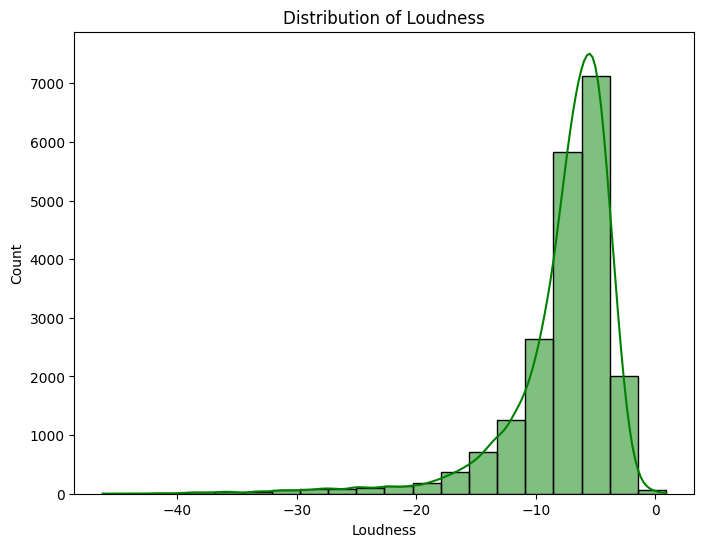

In [8]:
# Histogram of loudness
plt.figure(figsize=(8, 6))
sns.histplot(df['Loudness'], bins=20, kde=True, color="green")
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.show()

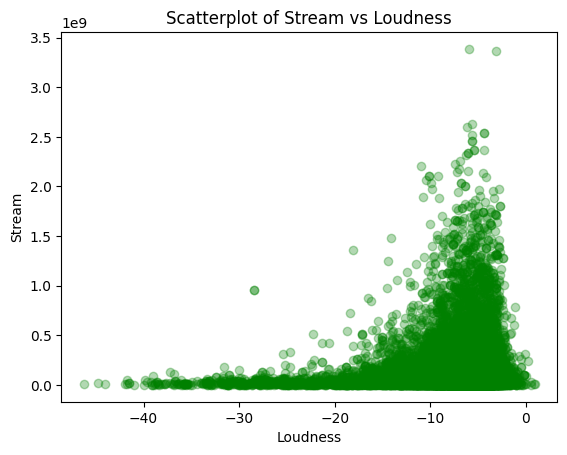

In [9]:
# Creating a scatterplot with the features "Loudness" and "Stream".
plt.scatter(df["Loudness"], df["Stream"], color="green", alpha = 0.3)

# Adding title, x- and y-axes labels.
plt.title("Scatterplot of Stream vs Loudness")
plt.xlabel("Loudness")
plt.ylabel("Stream")

# Displaying the plot.
plt.show()

### Dropping irrelevant columns

In [10]:
# Dropping irrelevant columns but keeping "Uri" as this will be used as unique identifier to check for duplicates
df_clean = df.drop(["Unnamed: 0", "Url_spotify", "Artist", "Album_type", "Album", "Track", "Url_youtube",
"Title", "Channel", "Views", "Likes", "Comments", "Description", "Licensed", "official_video"], axis=1)

# Displaying the cleaned data frame
df_clean

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [11]:
# Finding null values and data type
null_counts = df.isnull().sum()
data_types = df.dtypes

for column in df.columns:
    print("Feature:", column)
    print("Null Values:", null_counts[column])
    print("Data Type:", data_types[column])
    print()



Feature: Unnamed: 0
Null Values: 0
Data Type: int64

Feature: Artist
Null Values: 0
Data Type: object

Feature: Url_spotify
Null Values: 0
Data Type: object

Feature: Track
Null Values: 0
Data Type: object

Feature: Album
Null Values: 0
Data Type: object

Feature: Album_type
Null Values: 0
Data Type: object

Feature: Uri
Null Values: 0
Data Type: object

Feature: Danceability
Null Values: 2
Data Type: float64

Feature: Energy
Null Values: 2
Data Type: float64

Feature: Key
Null Values: 2
Data Type: float64

Feature: Loudness
Null Values: 2
Data Type: float64

Feature: Speechiness
Null Values: 2
Data Type: float64

Feature: Acousticness
Null Values: 2
Data Type: float64

Feature: Instrumentalness
Null Values: 2
Data Type: float64

Feature: Liveness
Null Values: 2
Data Type: float64

Feature: Valence
Null Values: 2
Data Type: float64

Feature: Tempo
Null Values: 2
Data Type: float64

Feature: Duration_ms
Null Values: 2
Data Type: float64

Feature: Url_youtube
Null Values: 470
Data Type: 

### Dropping null values and duplicates

In [12]:
# Selecting "Uri" column and searching for duplicates.
df_clean[df_clean["Uri"].duplicated()]

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
155,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.17600,0.000000,0.1840,0.483,131.971,194438.0,1.626858e+08
248,spotify:track:1T4tQ4SSagbhAKpvcWg035,0.742,0.617,2.0,-6.689,0.0345,0.05000,0.000059,0.0711,0.491,147.002,124188.0,6.273677e+07
296,spotify:track:2yEHX6MqAXPyD7bm47A2Br,0.660,0.942,4.0,-2.273,0.1850,0.00789,0.000018,0.8340,0.543,126.017,158571.0,2.790850e+07
312,spotify:track:5sNESr6pQfIhL3krM8CtZn,0.687,0.793,2.0,-4.254,0.1660,0.06030,0.000000,0.5820,0.751,107.045,205733.0,7.788802e+08
333,spotify:track:4Li2WHPkuyCdtmokzW2007,0.789,0.858,1.0,-5.542,0.3110,0.12700,0.000000,0.3490,0.775,140.022,219333.0,1.054471e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20672,spotify:track:6Um358vY92UBv5DloTRX9L,0.491,0.643,10.0,-4.309,0.0442,0.18700,0.000000,0.1090,0.779,162.469,169419.0,7.711181e+07
20673,spotify:track:0IKeDy5bT9G0bA7ZixRT4A,0.529,0.602,7.0,-4.629,0.0458,0.29900,0.000000,0.0716,0.756,157.643,271862.0,7.948799e+07
20675,spotify:track:1O0IFR3MYqgQbziKTCf0X4,0.641,0.517,0.0,-5.472,0.0673,0.52800,0.000000,0.1360,0.642,127.902,175424.0,2.399872e+07
20682,spotify:track:1RDvyOk4WtPCtoqciJwVn8,0.710,0.879,0.0,-4.218,0.0422,0.15800,0.001420,0.4390,0.341,114.993,201391.0,NaN


In [13]:
# Example of Uri duplicates.
df_clean[df_clean['Uri']=='spotify:track:0YJW8OXw8G1xDfkzaID3vv']

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
91,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.176,0.0,0.184,0.483,131.971,194438.0,162685755.0
155,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.176,0.0,0.184,0.483,131.971,194438.0,162685755.0
8029,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.176,0.0,0.184,0.483,131.971,194438.0,162685755.0


In [14]:
# Additional example of Uri duplicates.
df_clean[df_clean['Uri']=='spotify:track:1T4tQ4SSagbhAKpvcWg035']

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
169,spotify:track:1T4tQ4SSagbhAKpvcWg035,0.742,0.617,2.0,-6.689,0.0345,0.05,0.000059,0.0711,0.491,147.002,124188.0,62736773.0
248,spotify:track:1T4tQ4SSagbhAKpvcWg035,0.742,0.617,2.0,-6.689,0.0345,0.05,0.000059,0.0711,0.491,147.002,124188.0,62736773.0


In [15]:
# Count the number of duplicates in df_clean
num_duplicates = df_clean.duplicated().sum()

# Print the result
print("Number of duplicates:", num_duplicates)


Number of duplicates: 1674


In [16]:
# Removing all null values and duplicates
df_tune = df_clean.dropna().drop_duplicates(subset=["Uri"], keep="first")

# Removing the "Uri" feature for the final dataset "df_tune"
df_tune = df_tune.drop("Uri", axis=1)

# Displaying the final data frame.
df_tune

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [17]:
# Calculate the percentage of data entries removed
percent_removed = (1 - len(df_tune) / len(df)) * 100
percent_removed = round(percent_removed, 2)
print("After cleaning the dataset,", percent_removed, "percent of the data entries have been removed")


After cleaning the dataset, 11.58 percent of the data entries have been removed


### Adding a "Hit" column

In [18]:
# Add a "Hit" column for binary classification based on stream numbers
# If stream > 100,000,000 streams = 1
df_tune["Hit"] = df_tune["Stream"].apply(lambda x: 1 if x > 100000000 else 0)

# Displaying the dataframe
df_tune

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Hit
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09,1
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08,1
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07,0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08,1
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06,0
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07,0
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06,0
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06,0


## Data exploration after preprocessing

### Correlation between features

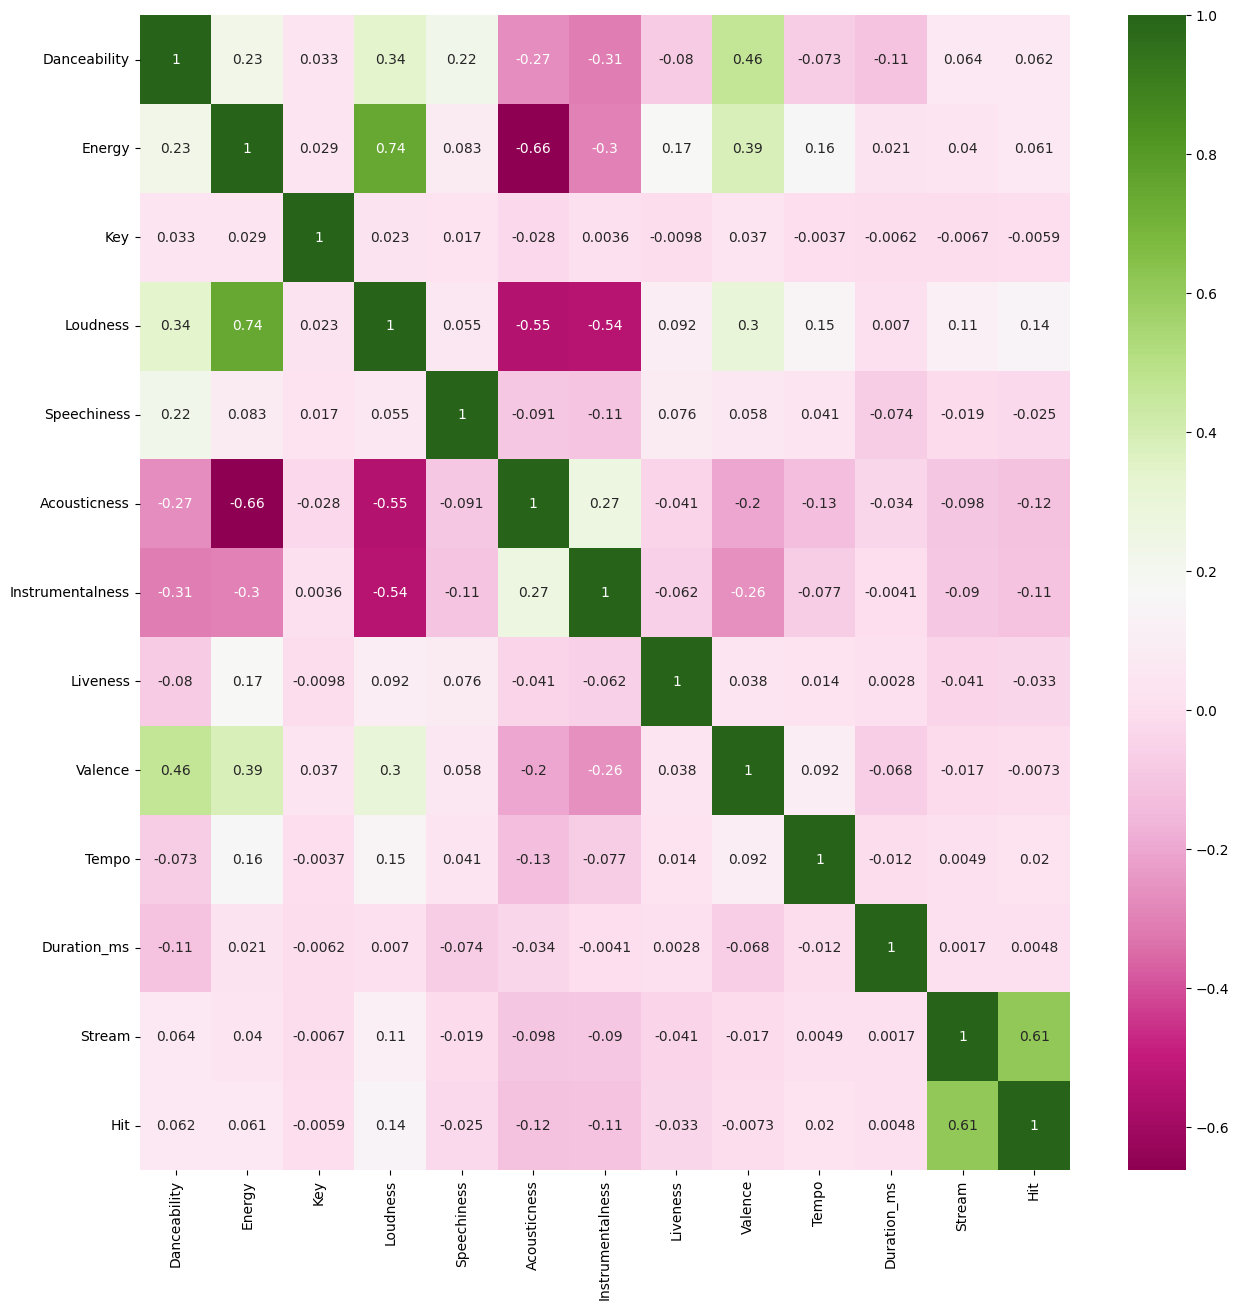

In [19]:
# Finding pairwise correlation of columns and saving it into variable "df_corr".
df_corr2 = df_tune.corr()

# Creating a a square-shaped figure for the plot.
fig, ax = plt.subplots(figsize=(15, 15))

# Generating a heatmap based on "df_corr2".
sns.heatmap(df_corr2, annot=True, cmap='PiYG', ax=ax)

# Displaying the heatmap.
plt.show()

The heatmap shows there is a positive correlation between the features: stream, comments, likes, and views meaning when one goes up, the other follows. This was also to be expected since a popular song on Spotify is more likely to be popular on YouTube and vice versa. As this was to be expected (data leak??), we excluded them from counting as influential features.


### Most and least important features

In [20]:
# Calculating the correlation matrix of dataframe "df_tune" without column "Stream".
df_no_stream_corr = df_tune.drop(columns=["Stream"]).corr()

# Sorting the correlation values in descending order.
df_no_stream_corr_sorted = df_no_stream_corr.iloc[:-1,-1].abs().sort_values(ascending=False)

# Print the most and least important features with three decimals.
print("Most important features:")
print(df_no_stream_corr_sorted.head().round(3))
print("\nLeast important features:")
print(df_no_stream_corr_sorted.tail().round(3))



Most important features:
Loudness            0.137
Acousticness        0.117
Instrumentalness    0.112
Danceability        0.062
Energy              0.061
Name: Hit, dtype: float64

Least important features:
Speechiness    0.025
Tempo          0.020
Valence        0.007
Key            0.006
Duration_ms    0.005
Name: Hit, dtype: float64


According to the heatmap and the code above, none of the features seem to influence the number of streams strongly. Although the feature “Loudness” has a correlation of 0.12. As the heatmap contains many features, it can become overcrowded, making it difficult to interpret the data and identify patterns. Because of that, we used a code to find the features with the largest influence on the number of streams. The result shows that the most important features in descending order are: “Loudness”, “Acousticness”, “Instrumentalness”, “Danceability”, and “Energy”.

### Distribution of hits

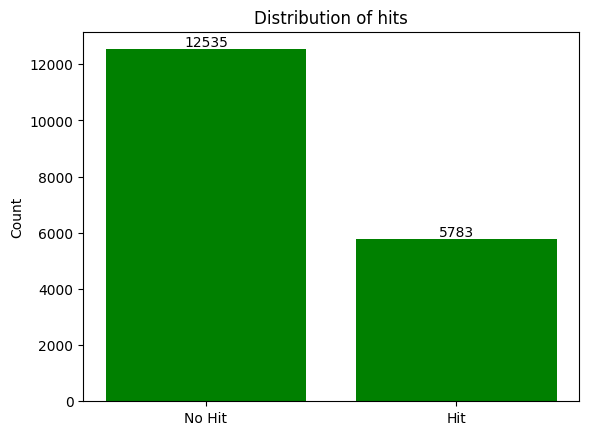

In [21]:
# Calculating the frequincies of "Hit" and "No hit".
value_counts = df_tune["Hit"].value_counts()

# Creating a bar plot.
plt.bar(value_counts.index, value_counts.values, color="green")

# Adding labels and title to the bar plot.
plt.ylabel("Count")
plt.title("Distribution of hits")

# Customizing x-axis labels.
plt.xticks(value_counts.index, ["No Hit", "Hit"])

# Displaying the frequincies on top of the bars.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Displaying the bar chart.
plt.show()


In [22]:
# Calculating the mean of the "Stream" column.
mean = df_tune['Stream'].mean()

print("Mean value of the 'Stream' column: ", mean)

Mean value of the 'Stream' column:  131748886.92837647


In [23]:
# Calculating the median of the "Stream" column.
median = df_tune['Stream'].median()

print("Median value of the 'Stream' column: ", median)

Median value of the 'Stream' column:  48633246.0


In [24]:
# Determining the lowest value of the "Stream" column.
lowest_value = df_tune['Stream'].min()

# Determining the highest value of the "Stream" column.
highest_value = df_tune['Stream'].max()

print("Lowest value:", lowest_value)
print("Highest value:", highest_value)

Lowest value: 6574.0
Highest value: 3386520288.0


## Data Modelling

### Create data split

In [25]:
# Splitting the data into data(X) and target(y).
X = df_tune.drop('Hit', axis=1).drop("Stream", axis=1)
y = df_tune['Hit']

print("X has shape", X.shape)
print("y has shape", y.shape)

X has shape (18318, 11)
y has shape (18318,)


In [26]:
# Splitting data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Size of the training set.
print("Number of instances in the training set: ", len(X_train))
print("Number of target labels in the training set: ", len(y_train))

# Size of the test set.
print("\nNumber of instances in the test set: ", len(X_test))
print("Number of target labels in the test set: ", len(y_test))

Number of instances in the training set:  14654
Number of target labels in the training set:  14654

Number of instances in the test set:  3664
Number of target labels in the test set:  3664


### StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

datascaled = StandardScaler().fit(X_train)
X_train = datascaled.fit_transform(X_train)
X_test = datascaled.fit_transform(X_test)

### Implementing SMOTE

In [28]:
!pip install imblearn==0.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [29]:
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples only on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Number of instances in the training set: ", len(X_train_resampled))
print("Number of target labels in the training set: ", len(y_train_resampled))

Number of instances in the training set:  20056
Number of target labels in the training set:  20056


### Distribution of hits

In [30]:
# Distribution of hits before SMOTE
y_train.value_counts(normalize=True)

0    0.684318
1    0.315682
Name: Hit, dtype: float64

In [31]:
# Distribution of hits after SMOTE
y_train_resampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: Hit, dtype: float64

### Model 1 - Dummy Classifier

In [32]:
# Creating instance of DummyClassifier and saving into variable "dummy_clf".
dummy = DummyClassifier(strategy="stratified",random_state=42)

# Training the "dummy_clf" model on the training set.
dummy.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
dummy_pred_train = dummy.predict(X_train_resampled)
dummy_pred_test = dummy.predict(X_test)
  

In [33]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, dummy_pred_train)
test_accuracy = accuracy_score(y_test, dummy_pred_test)

print('Accuracy on the training set: {:.3f}'.format(dummy.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(dummy.score(X_test, y_test)))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, dummy_pred_train)
test_recall = recall_score(y_test, dummy_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, dummy_pred_train)
test_precision = precision_score(y_test, dummy_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, dummy_pred_train)
test_f1 = f1_score(y_test, dummy_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 0.493
Accuracy on test set: 0.493

Recall on training set: 0.494
Recall on test set: 0.484

Precision on training set: 0.493
Precision on test set: 0.308

F1 score on training set: 0.493
F1 score on test set: 0.376



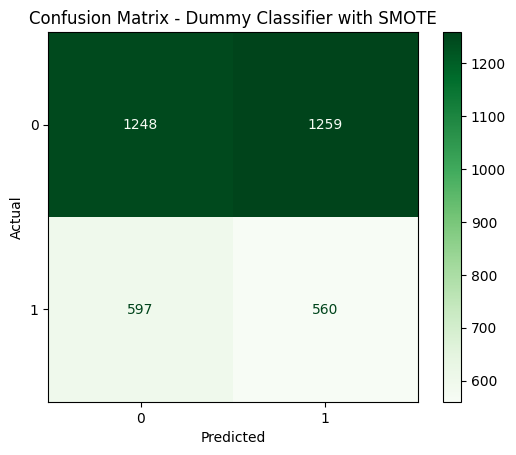

In [34]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
dummy_confusion = confusion_matrix(y_test, dummy_pred_test)

# Creating the confusion matrix display and saving it into variable "dummy_cm_display".
dummy_cm_display = ConfusionMatrixDisplay(confusion_matrix=dummy_confusion)

# Plotting the confusion matrix.
dummy_cm_display.plot(cmap='Greens')

# Adding labels and title to the plot.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Dummy Classifier with SMOTE')

# Displaying the plot.
plt.show()

If we didn't use the stratified strategy, the dummy would predict 0 FP  and 0 TP as it would only look at the majority class (Non hits). Using the stratified strategy will help balance the dataset and create false instances, which also is why it won't make that good predictions of hits.

### Model 2 - KNN

In [35]:
# Creating instance of KNeighborsClassifier and saving into variable "knn".
knn = KNeighborsClassifier()

# Training the KNeighborsClassifier model on the training set.
knn.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
knn_pred_train = knn.predict(X_train_resampled)
knn_pred_test = knn.predict(X_test)

In [36]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, knn_pred_train)
test_accuracy = accuracy_score(y_test, knn_pred_test)

print('Accuracy on the training set: {:.3f}'.format(knn.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(knn.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, knn_pred_train)
test_recall = recall_score(y_test, knn_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, knn_pred_train)
test_precision = precision_score(y_test, knn_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, knn_pred_train)
test_f1 = f1_score(y_test, knn_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on the training set: 0.798
Accuracy on test set: 0.536

Recall on training set: 0.928
Recall on test set: 0.574

Precision on training set: 0.736
Precision on test set: 0.355

F1 score on training set: 0.821
F1 score on test set: 0.439



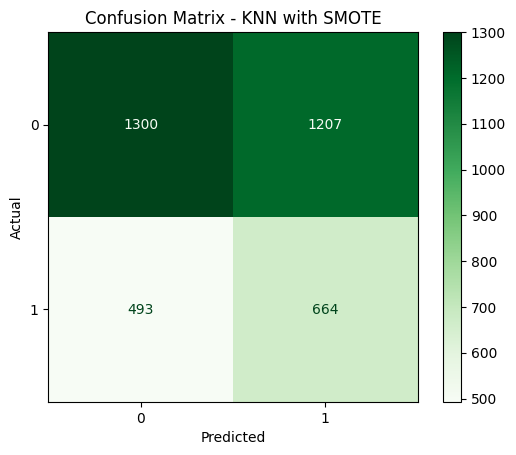

In [37]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
KNN_confusion = confusion_matrix(y_test, knn_pred_test)

# Creating the confusion matrix display and saving into variable "cm_display".
cm_display = ConfusionMatrixDisplay(confusion_matrix=KNN_confusion)

# Plotting the confusion matrix.
cm_display.plot(cmap='Greens')

# Adding labels and title to the plot.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN with SMOTE')

# Displaying the plot.
plt.show()

Train    Test    n_neighbors
1.0000   0.6029  1   
0.7500   0.6354  5   
0.7329   0.6520  7   
0.7120   0.6719  10   
0.7097   0.6777  12   
0.7070   0.6648  15   
0.6956   0.6717  20   


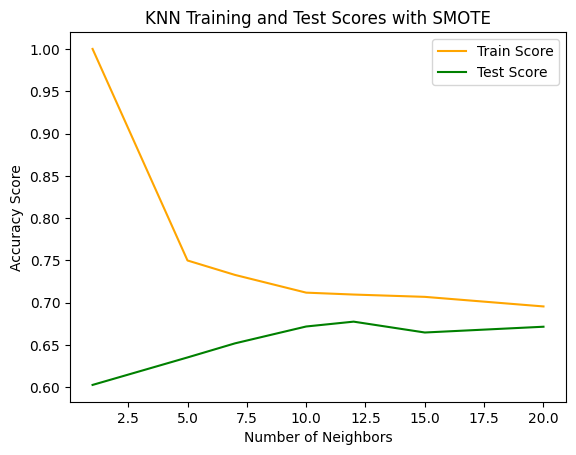

In [38]:
import matplotlib.pyplot as plt

# Testing different KNN neighbors by comparing accuracy score on test and train set.
knn_train_scores = []
knn_test_scores = []
neighbors = [1, 5, 7, 10, 12, 15, 20]

# Creating a loop and calculating different accuracy scores based on "n_neighbors" integer.
print("Train    Test    n_neighbors")
for d in neighbors:
    knntries = KNeighborsClassifier(n_neighbors=d, weights="uniform").fit(X_train, y_train)
    
    knn_train = knntries.score(X_train, y_train)
    knn_train_scores.append(knn_train)
    
    knn_test = knntries.score(X_test, y_test)   
    knn_test_scores.append(knn_test)

    print("{:.4f}   {:.4f}  {}   ".format(knn_train, knn_test, d))

# Creating line chart
plt.plot(neighbors, knn_train_scores, label='Train Score', color='orange')
plt.plot(neighbors, knn_test_scores, label='Test Score', color='green')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNN Training and Test Scores with SMOTE')
plt.legend()
plt.show()



### Model 2 - KNN (tuned)

In [39]:
# Creating an instance of KNeighborsClassifier with tuned parameters n_neighbors and weights) 
#saving into variable "knn".
knn_tuned = KNeighborsClassifier(n_neighbors = 12, weights ="uniform")

knn_tuned.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
knn_tuned_pred_train = knn_tuned.predict(X_train_resampled)
knn_tuned_pred_test = knn_tuned.predict(X_test)

In [40]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, knn_tuned_pred_train)
test_accuracy = accuracy_score(y_test, knn_tuned_pred_test)

print('Accuracy on the training set: {:.3f}'.format(knn_tuned.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(knn_tuned.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, knn_tuned_pred_train)
test_recall = recall_score(y_test, knn_tuned_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, knn_tuned_pred_train)
test_precision = precision_score(y_test, knn_tuned_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, knn_tuned_pred_train)
test_f1 = f1_score(y_test, knn_tuned_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on the training set: 0.733
Accuracy on test set: 0.554

Recall on training set: 0.813
Recall on test set: 0.546

Precision on training set: 0.701
Precision on test set: 0.363

F1 score on training set: 0.753
F1 score on test set: 0.436



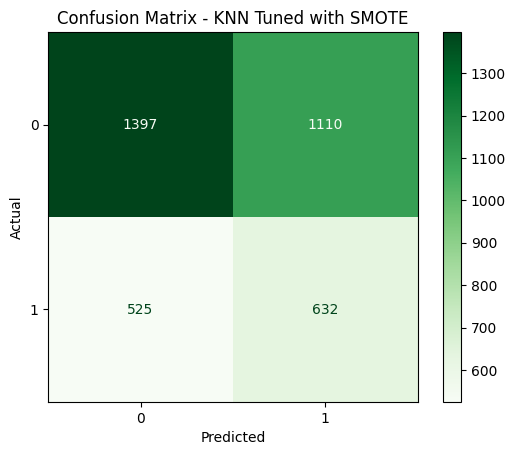

In [41]:
# Calculate confusion matrix
KNN_confusion_tuned = confusion_matrix(y_test, knn_tuned_pred_test)

# Create confusion matrix display
cm_tuned_display = ConfusionMatrixDisplay(confusion_matrix=KNN_confusion_tuned)

# Plot confusion matrix
cm_tuned_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Tuned with SMOTE')

# Show the plot
plt.show()

Training set shows overfitting, but tuning helps the accuracy on the test set

### Decision Tree

Train    Test    max_depth
0.5469   0.3870    1   
0.5696   0.4282    2   
0.5829   0.5120    3   
0.5888   0.5227    4   
0.5951   0.4820    5   
0.6085   0.5033    6   
0.6235   0.5257    7   
0.6447   0.5049    8   
0.6586   0.5115    9   
0.6812   0.5393    10   
0.7431   0.5453    12   
0.8245   0.5609    15   


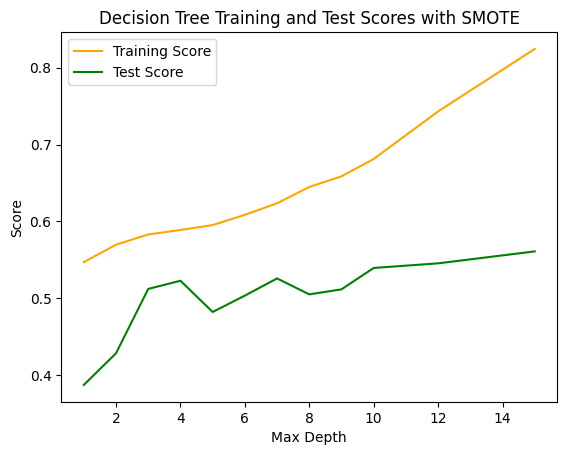

In [42]:
import matplotlib.pyplot as plt

# Creating lists for max_depth values, training scores, test scores
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]
dt_train_scores = []
dt_test_scores = []

print("Train    Test    max_depth")
for d in max_depths:
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=d).fit(X_train_resampled, y_train_resampled)
            
    dt_train = dt_model.score(X_train_resampled, y_train_resampled)
    dt_train_scores.append(dt_train)
    
    dt_test = dt_model.score(X_test, y_test)   
    dt_test_scores.append(dt_test)

    print("{:.4f}   {:.4f}    {}   ".format(dt_train, dt_test, d))

# Creating the line chart
plt.plot(max_depths, dt_train_scores, label='Training Score', color='orange')
plt.plot(max_depths, dt_test_scores, label='Test Score', color='green')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Decision Tree Training and Test Scores with SMOTE')
plt.legend()

# Displaying the line chart
plt.show()


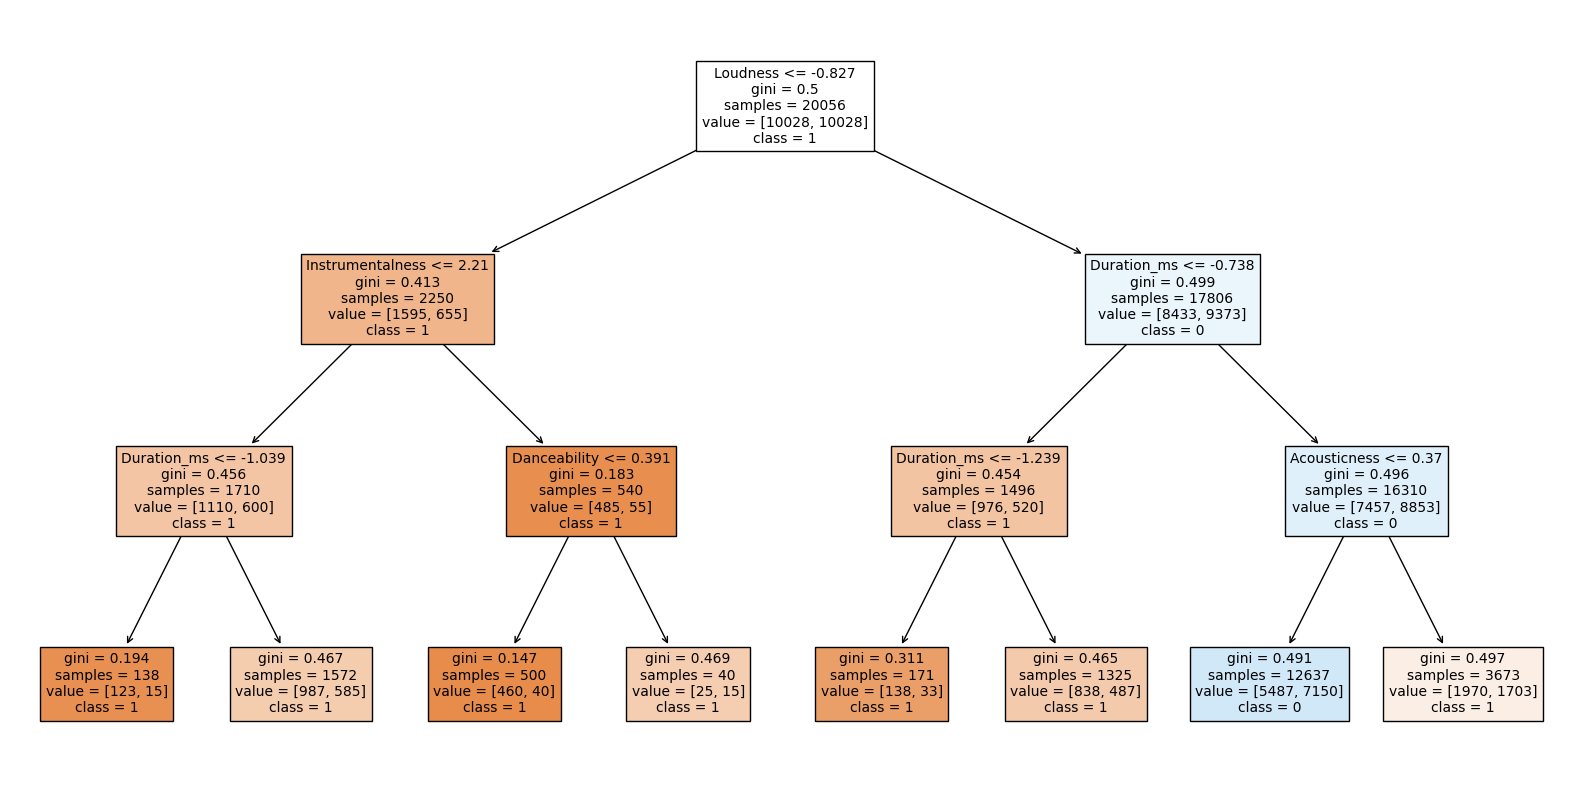

In [43]:
# Create the decision tree classifier
dt_tuned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_tuned.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
dt_tuned_pred_train = dt_tuned.predict(X_train_resampled)
dt_tuned_pred_test = dt_tuned.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_tuned, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.show()

In [44]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, dt_tuned_pred_train)
test_accuracy = accuracy_score(y_test, dt_tuned_pred_test)

print('Accuracy on the training set: {:.3f}'.format(dt_tuned.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(dt_tuned.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, dt_tuned_pred_train)
test_recall = recall_score(y_test, dt_tuned_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, dt_tuned_pred_train)
test_precision = precision_score(y_test, dt_tuned_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, dt_tuned_pred_train)
test_f1 = f1_score(y_test, dt_tuned_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 0.583
Accuracy on test set: 0.512

Recall on training set: 0.713
Recall on test set: 0.709

Precision on training set: 0.566
Precision on test set: 0.361

F1 score on training set: 0.631
F1 score on test set: 0.478



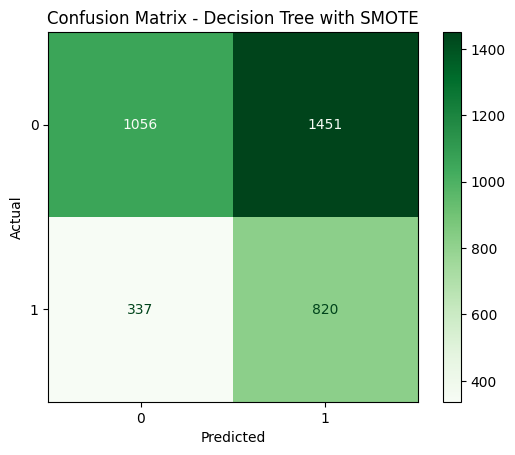

In [45]:
# Calculate confusion matrix
dt_confusion_tuned = confusion_matrix(y_test, dt_tuned_pred_test)

# Create confusion matrix display
dt_tuned_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_tuned)

# Plot confusion matrix
dt_tuned_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree with SMOTE')

# Show the plot
plt.show()

### Model 4 - Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the model and its parameters
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
rfc_pred_train = rfc.predict(X_train_resampled)
rfc_pred_test = rfc.predict(X_test)


In [47]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, rfc_pred_train)
test_accuracy = accuracy_score(y_test, rfc_pred_test)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(rfc.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, rfc_pred_train)
test_recall = recall_score(y_test, rfc_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, rfc_pred_train)
test_precision = precision_score(y_test, rfc_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, rfc_pred_train)
test_f1 = f1_score(y_test, rfc_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 1.000
Accuracy on test set: 0.638

Recall on training set: 1.000
Recall on test set: 0.383

Precision on training set: 1.000
Precision on test set: 0.420

F1 score on training set: 1.000
F1 score on test set: 0.400



### Confusion Matrix for Random Forest

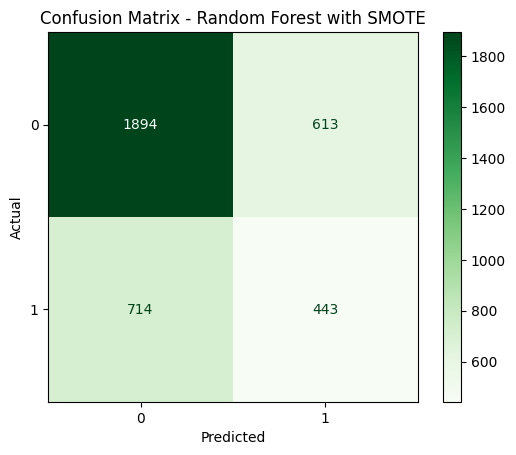

In [48]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, rfc_pred_test)

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plot confusion matrix
cm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with SMOTE')

# Show the plot
plt.show()


In [49]:
#test of max n_estimators
rfc_train_scores = []
rfc_test_scores = []

print("Train    Test    n_estimators")
for d in (1, 5, 10, 20, 100, 200, 300):
    rfctries = RandomForestClassifier(n_estimators=d, random_state=42).fit(X_train_resampled, y_train_resampled)
            
    rfc_train = rfctries.score(X_train_resampled, y_train_resampled)
    rfc_train_scores.append(rfc_train)
    
    rfc_test = rfctries.score(X_test, y_test)   
    rfc_test_scores.append(rfc_test)

    print("{:.4f}   {:.4f}  {}   ".format(rfc_train, rfc_test, d))

Train    Test    n_estimators
0.8621   0.5489  1   
0.9706   0.5761  5   
0.9900   0.6165  10   
0.9988   0.6245  20   
1.0000   0.6378  100   
1.0000   0.6318  200   
1.0000   0.6346  300   


In [50]:
rfc_train_scores = []
rfc_test_scores = []

# Creating a loop and calculating different accuracy scores based on "max_depth".
print("Train    Test    max_depth")
for depth in (None, 1, 5, 9, 10, 13, 14, 15, 16, 17, 20, 50):
    rfctries = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42).fit(X_train, y_train)
            
    rfc_train = rfctries.score(X_train_resampled, y_train_resampled)
    rfc_train_scores.append(rfc_train)
    
    rfc_test = rfctries.score(X_test, y_test)   
    rfc_test_scores.append(rfc_test)

    print("{:.4f}   {:.4f}  {}   ".format(rfc_train, rfc_test, depth))

Train    Test    max_depth
0.8699   0.6796  None   
0.5000   0.6842  1   
0.5001   0.6842  5   
0.5037   0.6861  9   
0.5120   0.6853  10   
0.6057   0.6867  13   
0.6548   0.6823  14   
0.7050   0.6883  15   
0.7433   0.6859  16   
0.7784   0.6831  17   
0.8384   0.6812  20   
0.8699   0.6796  50   


### Random forest (tuned)

In [51]:
# Define the model and its parameters
rfc_tuned = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to the training data
rfc_tuned.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
rfc_tuned_pred_train = rfc_tuned.predict(X_train_resampled)
rfc_tuned_pred_test = rfc_tuned.predict(X_test)

In [52]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, rfc_tuned_pred_train)
test_accuracy = accuracy_score(y_test, rfc_tuned_pred_test)

print('Accuracy on the training set: {:.3f}'.format(rfc_tuned.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(rfc_tuned.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, rfc_tuned_pred_train)
test_recall = recall_score(y_test, rfc_tuned_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, rfc_tuned_pred_train)
test_precision = precision_score(y_test, rfc_tuned_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, rfc_tuned_pred_train)
test_f1 = f1_score(y_test, rfc_tuned_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 1.000
Accuracy on test set: 0.632

Recall on training set: 1.000
Recall on test set: 0.378

Precision on training set: 1.000
Precision on test set: 0.410

F1 score on training set: 1.000
F1 score on test set: 0.393



The n_estimators is set to 200, indicating that the Random Forest will consist of 200 decision trees. random_state is set to 42 to ensure reproducibility with a specific random seed. You can adjust these values according to your needs and preferences.

### Confusion Matrix for Random Forest (tuned)

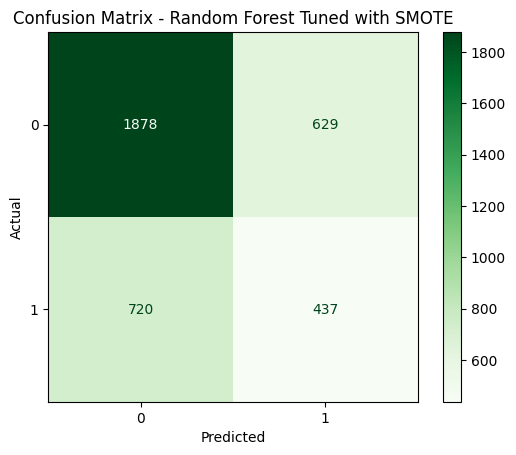

In [53]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, rfc_tuned_pred_test)

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plot confusion matrix
cm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Tuned with SMOTE')

# Show the plot
plt.show()

### Random forest (max_depth=15)

In [54]:
# Creating an instance of RandomForestClassifier with tuned parameters "n_estimators" and "random_state"
# and saving into variable "rfc_tuned2".
rfc_tuned2 = RandomForestClassifier(max_depth=15, random_state=42)

# Training the model on the training set.
rfc_tuned2.fit(X_train_resampled, y_train_resampled)

# Making predictions on the training and test set.
rfc_tuned2_pred_train = rfc_tuned2.predict(X_train_resampled)
rfc_tuned2_pred_test = rfc_tuned2.predict(X_test)

In [55]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, rfc_tuned2_pred_train)
test_accuracy = accuracy_score(y_test, rfc_tuned2_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, rfc_tuned2_pred_train)
test_recall = recall_score(y_test, rfc_tuned2_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, rfc_tuned2_pred_train)
test_precision = precision_score(y_test, rfc_tuned2_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, rfc_tuned2_pred_train)
test_f1 = f1_score(y_test, rfc_tuned2_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on training set: 0.907
Accuracy on test set: 0.593

Recall on training set: 0.996
Recall on test set: 0.541

Precision on training set: 0.845
Precision on test set: 0.395

F1 score on training set: 0.914
F1 score on test set: 0.456



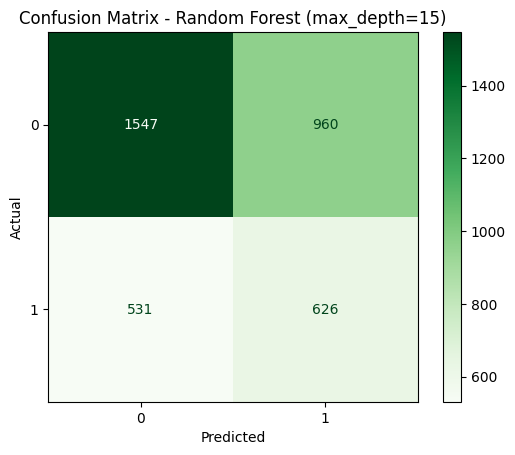

In [56]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
confusion = confusion_matrix(y_test, rfc_tuned2_pred_test)

# Creating the confusion matrix display and saving into variable "cm_display".
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plotting the confusion matrix.
cm_display.plot(cmap="Greens")

# Adding labels and title to the confusion matrix.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (max_depth=15)')

# Displaying the plot.
plt.show()

### Model 5 - Logistic regression

In [57]:
# Create a logistic regression classifier
log = LogisticRegression(random_state=42)

# Train the classifier on the training data
log.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
log_pred_train = log.predict(X_train_resampled)
log_pred_test = log.predict(X_test)


In [58]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, log_pred_train)
test_accuracy = accuracy_score(y_test, log_pred_test)

print('Accuracy on the training set: {:.3f}'.format(log.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(log.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, log_pred_train)
test_recall = recall_score(y_test, log_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, log_pred_train)
test_precision = precision_score(y_test, log_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, log_pred_train)
test_f1 = f1_score(y_test, log_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on the training set: 0.593
Accuracy on test set: 0.547

Recall on training set: 0.685
Recall on test set: 0.645

Precision on training set: 0.579
Precision on test set: 0.374

F1 score on training set: 0.628
F1 score on test set: 0.473



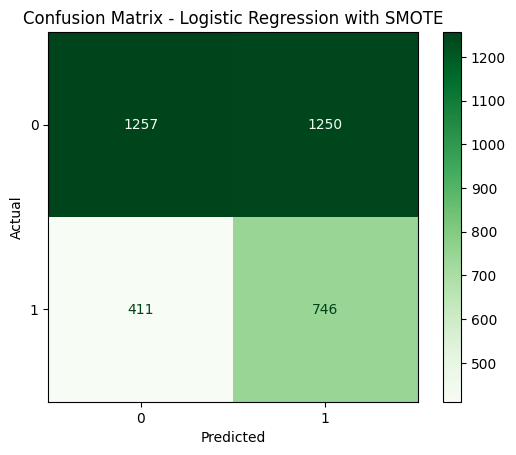

In [59]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, log_pred_test)

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plot confusion matrix
cm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE')

# Show the plot
plt.show()

### Logistic regression (fixing underfitting test data)

In [60]:
# Create a logistic regression classifier with L1 regularization
log2 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Train the classifier on the training data
log2.fit(X_train_resampled, y_train_resampled)

# Utilizing the model to make predictions on the training set and test set.
log2_pred_train = log2.predict(X_train_resampled)
log2_pred_test = log2.predict(X_test)

In [61]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, log2_pred_train)
test_accuracy = accuracy_score(y_test, log2_pred_test)

print('Accuracy on the training set: {:.3f}'.format(log2.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(log2.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, log2_pred_train)
test_recall = recall_score(y_test, log2_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, log2_pred_train)
test_precision = precision_score(y_test, log2_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, log2_pred_train)
test_f1 = f1_score(y_test, log2_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on the training set: 0.593
Accuracy on test set: 0.547

Recall on training set: 0.686
Recall on test set: 0.645

Precision on training set: 0.579
Precision on test set: 0.374

F1 score on training set: 0.628
F1 score on test set: 0.473



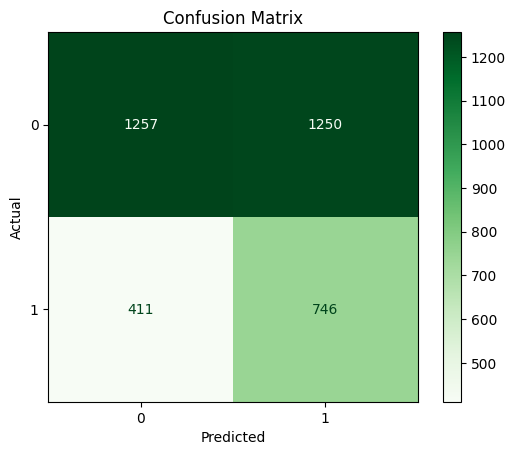

In [62]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, log2_pred_test)

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plot confusion matrix
cm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Changing the value of the C by 0.1, 1 and 10 to fix underfitting testing data

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the C values to try
C_values = [0.01, 0.1, 1, 10, 100]

best_test_accuracy = 0.0
best_train_accuracy = 0.0
best_C = None

for C in C_values:
    # Create a logistic regression model with the current C value
    log3 = LogisticRegression(C=C, random_state=42)

    # Train the classifier on the training data
    log3.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    log3_pred_test = log3.predict(X_test)
    log3_pred_train = log3.predict(X_train_resampled)

    # Calculate the accuracy of the model on the test set
    test_accuracy = accuracy_score(y_test, log3_pred_test)
    train_accuracy = accuracy_score(y_train_resampled, log3_pred_train)

    # Print the test accuracy for the current C value with three decimal places
    print("C =", C)
    print("Training Accuracy: {:.3f}".format(train_accuracy))
    print("Test Accuracy: {:.3f}".format(test_accuracy))
    print()

    # Check if the current C value has better test accuracy than the previous best accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_train_accuracy = train_accuracy
        best_C = C

# Print the best C value and its corresponding training and test accuracies
print("Best C Value:", best_C)
print("Best Training Accuracy: {:.3f}".format(best_train_accuracy))
print("Best Test Accuracy: {:.3f}".format(best_test_accuracy))

C = 0.01
Training Accuracy: 0.593
Test Accuracy: 0.545

C = 0.1
Training Accuracy: 0.593
Test Accuracy: 0.547

C = 1
Training Accuracy: 0.593
Test Accuracy: 0.547

C = 10
Training Accuracy: 0.593
Test Accuracy: 0.547

C = 100
Training Accuracy: 0.593
Test Accuracy: 0.547

Best C Value: 0.1
Best Training Accuracy: 0.593
Best Test Accuracy: 0.547


In [64]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train_resampled, log3_pred_train)
test_accuracy = accuracy_score(y_test, log3_pred_test)

print('Accuracy on the training set: {:.3f}'.format(log3.score(X_train_resampled, y_train_resampled)))
print('Accuracy on test set: {:.3f}\n'.format(log3.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train_resampled, log3_pred_train)
test_recall = recall_score(y_test, log3_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train_resampled, log3_pred_train)
test_precision = precision_score(y_test, log3_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train_resampled, log3_pred_train)
test_f1 = f1_score(y_test, log3_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 0.593
Accuracy on test set: 0.547

Recall on training set: 0.686
Recall on test set: 0.645

Precision on training set: 0.579
Precision on test set: 0.374

F1 score on training set: 0.628
F1 score on test set: 0.473



### Confusion matrix for logistic regression (after fixing underfitting test data)

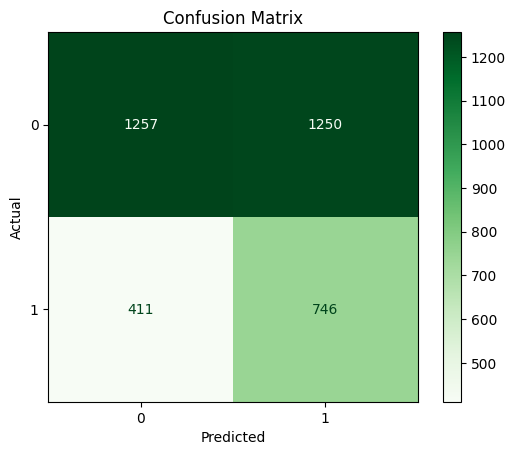

In [65]:
# Create a logistic regression classifier with the best C value
best_clf = LogisticRegression(C=best_C, random_state=42)

# Train the classifier on the training data
best_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
clf_pred3 = best_clf.predict(X_test)

# Create a confusion matrix
logconfusion = confusion_matrix(y_test, log3_pred_test)

# Create confusion matrix display
logcm_display = ConfusionMatrixDisplay(confusion_matrix=logconfusion)

# Plot confusion matrix
logcm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77abf805-423e-43fc-b062-b29e448fba87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>